<a href="https://colab.research.google.com/github/subodhkanoujiya4/K-Nearest_Neighbors_-KNN-_Classification/blob/main/K_Nearest_Neighbors_(KNN)_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Objective: Understand and implement KNN for classification problems.**##

## Upload Iris.csv Dataset.

In [7]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris (1).csv


## Imports necessary libraries.
## Show Confusion Matrix for K=5.


Confusion Matrix for K=5


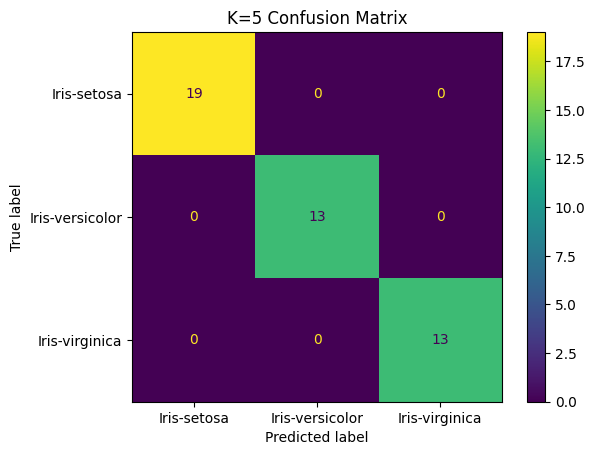

In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.colors import ListedColormap

# Step 1: Load dataset
df = pd.read_csv("Iris.csv")

# Drop ID column if present
if 'Id' in df.columns:
    df = df.drop('Id', axis=1)

# Separate features and target
X = df.drop('Species', axis=1)
y = df['Species']

# Step 2: Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Step 4: Train KNN with different K values and evaluate
k_range = range(1, 21)
accuracy_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_list.append(acc)

    if k == 5:
        print(f"\nConfusion Matrix for K={k}")
        cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
        disp.plot()
        plt.title(f"K={k} Confusion Matrix")
        plt.show()



## KNN Accuracy for Diffferent K Values.


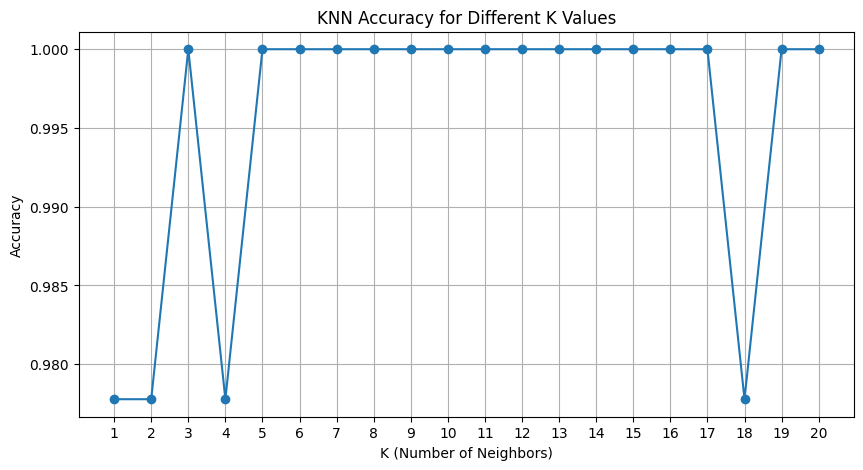

In [9]:
# Step 5: Plot accuracy vs. K
plt.figure(figsize=(10, 5))
plt.plot(k_range, accuracy_list, marker='o', linestyle='-')
plt.title("KNN Accuracy for Different K Values")
plt.xlabel("K (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.xticks(k_range)
plt.show()


## Optional: Visualize Decision Boundaries (2D)
We'll use only two features to visualize decision boundaries.

## KNN Decision Boundary (K=5)

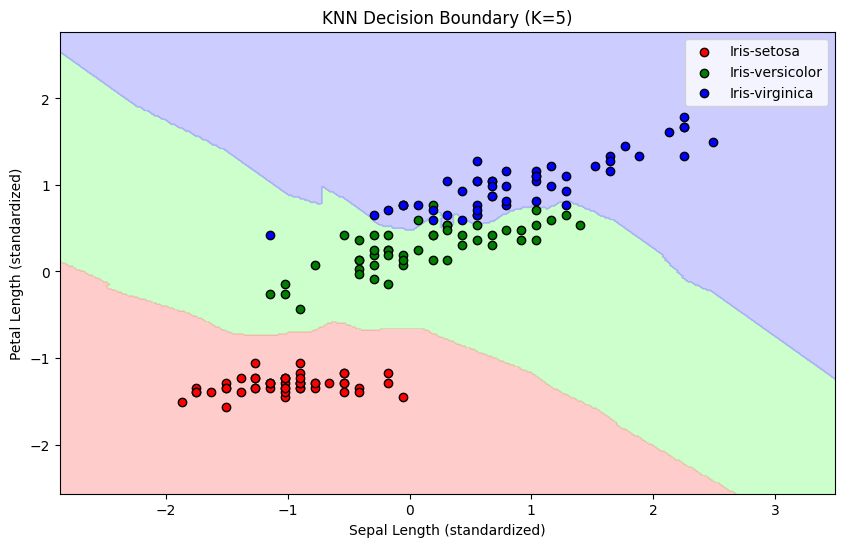

In [10]:
# Use only first two features for visualization
X_vis = X_scaled[:, [0, 2]]  # SepalLengthCm and PetalLengthCm
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y, test_size=0.3, random_state=42)

# Map species labels to numerical values
label_map = {label: idx for idx, label in enumerate(y.unique())}
y_train_vis_numeric = y_train_vis.map(label_map)
y_test_vis_numeric = y_test_vis.map(label_map)

# Train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_vis, y_train_vis_numeric)

# Create meshgrid
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict on meshgrid and convert labels to numerical values
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(10, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ['red', 'green', 'blue']
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)

for label, color in zip(y.unique(), cmap_bold):
    plt.scatter(X_vis[y == label, 0], X_vis[y == label, 1], label=label, edgecolor='k', c=color)

plt.xlabel("Sepal Length (standardized)")
plt.ylabel("Petal Length (standardized)")
plt.title("KNN Decision Boundary (K=5)")
plt.legend()
plt.show()